In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

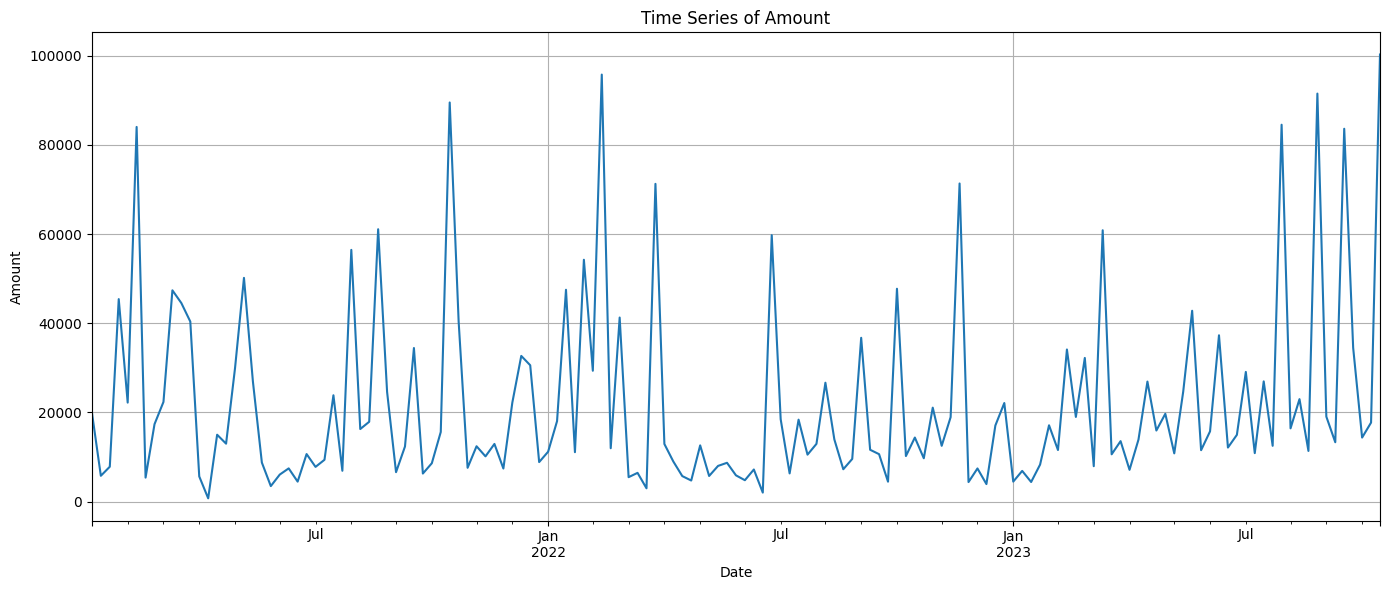

/Users/kingced/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/kingced/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/kingced/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Test MSE: 547836002.28
Test RMSE: 23405.90
Test MAE: 16953.30


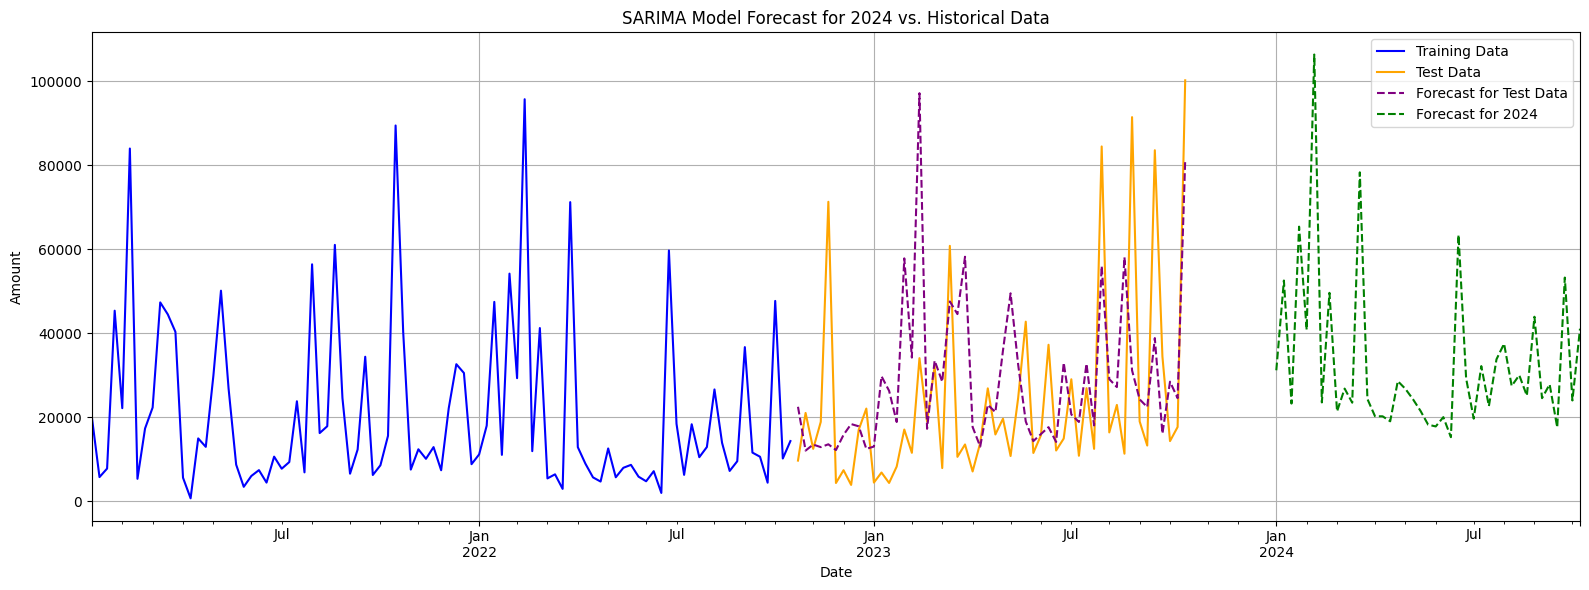

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 1. Data Loading and Preprocessing
data = pd.read_csv('TimesSeries.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 2. Data Visualization
plt.figure(figsize=(14, 6))
data['Amount'].plot(title='Time Series of Amount')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

# Splitting data for model evaluation
train = data['Amount'][:-52]
test = data['Amount'][-52:]

# 3. Model Fitting with SARIMA
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
results = model.fit(disp=False)

# 4. Forecasting on the Test Data
forecast_test = results.get_forecast(steps=len(test))  # Forecasting on the test data
forecast_mean_test = forecast_test.predicted_mean

# 5. Model Evaluation
mse_test = mean_squared_error(test, forecast_mean_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(test, forecast_mean_test)

# Print test performance metrics
print(f'Test MSE: {mse_test:.2f}')
print(f'Test RMSE: {rmse_test:.2f}')
print(f'Test MAE: {mae_test:.2f}')

# 6. Forecasting for 2024
forecast_2024 = results.forecast(steps=52 + 52)  # Forecasting for the rest of 2023 and 2024
forecast_2024 = forecast_2024['2024']

# 7. Visualization of the Forecast
plt.figure(figsize=(16, 6))
train.plot(label='Training Data', color='blue')
test.plot(label='Test Data', color='orange')
forecast_mean_test.plot(label='Forecast for Test Data', color='purple', linestyle='--')
forecast_2024.plot(label='Forecast for 2024', color='green', linestyle='--')
plt.title('SARIMA Model Forecast for 2024 vs. Historical Data')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
